# Navigation

---

Congratulations for completing the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893)!  In this notebook, you will learn how to control an agent in a more challenging environment, where it can learn directly from raw pixels!  **Note that this exercise is optional!**

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

INFO:matplotlib.font_manager:font search path ['/home/aras/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf', '/home/aras/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/afm', '/home/aras/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/pdfcorefonts']
/home/aras/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '
INFO:matplotlib.font_manager:generated new fontManager


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/VisualBanana.app"`
- **Windows** (x86): `"path/to/VisualBanana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/VisualBanana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/VisualBanana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/VisualBanana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/VisualBanana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `VisualBanana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="VisualBanana.app")
```

In [3]:
env = UnityEnvironment(file_name='/home/aras/unity-envs/VisualBanana_Linux/Banana.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Banana_Linux_NoVis/Banana.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The environment state is an array of raw pixels with shape `(1, 84, 84, 3)`.  *Note that this code differs from the notebook for the project, where we are grabbing **`visual_observations`** (the raw pixels) instead of **`vector_observations`**.* A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Number of agents: 1
Number of actions: 4
States look like:


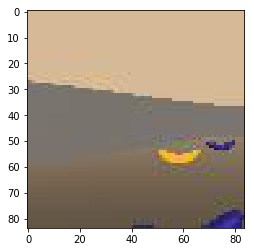

States have shape: (1, 84, 84, 3)


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
num_steps = 0
batch = []
while True:
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.visual_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    batch.append([state, action, next_state, reward, float(done)])
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
num_steps

Score: 1.0


300

In [7]:
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])

In [8]:
states.shape, actions.shape, next_states.shape, rewards.shape, dones.shape

((300, 1, 84, 84, 3), (300,), (300, 1, 84, 84, 3), (300,), (300,))

In [9]:
states.dtype, actions.dtype, rewards.dtype, dones.dtype

(dtype('float64'), dtype('int64'), dtype('float64'), dtype('float64'))

In [10]:
# rewards

When finished, you can close the environment.

In [11]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [12]:
# batch[0]

In [13]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state/ vector
state = env_info.visual_observations[0]            # get the current state/ visual
score = 0                                          # initialize the score
num_steps = 0
while True:
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #next_state = env_info.vector_observations[0]   # get the next state
    next_state = state = env_info.visual_observations[0]            # get the current state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state.shape)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
num_steps

Score: 1.0


300

In [14]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/home/aras/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.7.1
Default GPU Device: 


In [15]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#state = env_info.vector_observations[0]            # get the current state
state = env_info.visual_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
num_steps = 0
while True: # infinite number of steps
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #next_state = env_info.vector_observations[0]   # get the next state
    next_state = env_info.visual_observations[0]            # get the current state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state, action, reward, done)
    batch.append([state, action, next_state, reward, float(done)])
    if done:                                       # exit loop if episode finished
        break
    
# print("Score: {}".format(score))
num_steps

300

In [16]:
states = np.array([each[0] for each in batch])
actions = np.array([each[1] for each in batch])
next_states = np.array([each[2] for each in batch])
rewards = np.array([each[3] for each in batch])
dones = np.array([each[4] for each in batch])
# infos = np.array([each[4] for each in batch])

In [17]:
print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)))
print((np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(300,) (300, 1, 84, 84, 3) (300,) (300,)
float64 float64 int64 float64
3 0
4
1.0 0.0
1

In [18]:
def model_input(state_size):
    states = tf.placeholder(tf.float32, [None, *state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    return states, actions, targetQs

In [19]:
# # Has to be convolutional!
# # Generator: Generating/prediting the actions
# def generator(states, action_size, hidden_size, reuse=False, alpha=0.1, training=False):
#     with tf.variable_scope('generator', reuse=reuse):
#         # First fully connected layer
#         h1 = tf.layers.dense(inputs=states, units=hidden_size)
#         bn1 = tf.layers.batch_normalization(h1, training=training)        
#         nl1 = tf.maximum(alpha * bn1, bn1)
        
#         # Second fully connected layer
#         h2 = tf.layers.dense(inputs=nl1, units=hidden_size)
#         bn2 = tf.layers.batch_normalization(h2, training=training)        
#         nl2 = tf.maximum(alpha * bn2, bn2)
        
#         # Output layer
#         logits = tf.layers.dense(inputs=nl2, units=action_size)        
#         #predictions = tf.nn.softmax(logits)

#         # return actions logits
#         return logits

In [20]:
# tf.layers.conv2d(
#     inputs, ----------
#     filters, -------------
#     kernel_size, ------------
#     strides=(1, 1), ---------------
#     padding='valid', ------------
#     data_format='channels_last', -------------> NHWC and not NCHW
#     dilation_rate=(1, 1), -------------------
#     activation=None,
#     use_bias=True, ------------------
#     kernel_initializer=None,
#     bias_initializer=tf.zeros_initializer(), ------------------
#     kernel_regularizer=None,
#     bias_regularizer=None,
#     activity_regularizer=None,
#     kernel_constraint=None,
#     bias_constraint=None,
#     trainable=True, ---------------------
#     name=None,
#     reuse=None
# )

In [21]:
def generator(states, action_size, reuse=False, alpha=0.1, training=True):
    with tf.variable_scope('generator', reuse=reuse):
        # (300, 1, 84, 84, 3)
        #inputs_conv = tf.reshape(states, [-1, 84, 84, 3])
        print(states.shape)
        
        # Input layer is 32x32x3--> (84, 84, 3)
        h1 = tf.layers.conv2d(inputs=states, filters=8, kernel_size=5, strides=2, padding='same')
        bn1 = tf.layers.batch_normalization(h1, training=training)
        nl1 = tf.maximum(alpha * bn1, bn1)
        print(nl1.shape)
        # 16x16x64--> (42, 42, 8)
        h2 = tf.layers.conv2d(inputs=nl1, filters=8*2, kernel_size=5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(h2, training=training)
        nl2 = tf.maximum(alpha * bn2, bn2)
        print(nl2.shape)
        # 8x8x128--> (21, 21, 8*2)        
        h3 = tf.layers.conv2d(inputs=nl2, filters=8*2*2, kernel_size=6, strides=1, padding='valid')
        bn3 = tf.layers.batch_normalization(h3, training=training)
        nl3 = tf.maximum(alpha * bn3, bn3)
        print(nl3.shape)
        # 4x4x256--> (16, 16, 8*2*2)
        h4 = tf.layers.conv2d(inputs=nl3, filters=8*2*2*2, kernel_size=5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=training)
        nl4 = tf.maximum(alpha * bn4, bn4)
        print(nl4.shape)
        # 4x4x256--> (8, 8, 8*2*2*2)
        
        ############# Extra
        h4 = tf.layers.conv2d(inputs=nl4, filters=8*2*2*2*2, kernel_size=5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=training)
        nl4 = tf.maximum(alpha * bn4, bn4)
        print(nl4.shape)
        # 4x4x256--> (4, 4, 64*2)
        h4 = tf.layers.conv2d(inputs=nl4, filters=8*2*2*2*2*2, kernel_size=5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=training)
        nl4 = tf.maximum(alpha * bn4, bn4)
        print(nl4.shape)
        # 4x4x256--> (2, 2, 64*2*2)
        h4 = tf.layers.conv2d(inputs=nl4, filters=8*2*2*2*2*2*2, kernel_size=5, strides=2, padding='same')
        bn4 = tf.layers.batch_normalization(h4, training=training)
        nl4 = tf.maximum(alpha * bn4, bn4)
        print(nl4.shape)
        # 4x4x256--> (1, 1, 64*2*2*2)

        # Fully-connected with the flat tensor: (1, 1, 64*2*2*2) -> 1*1*64*2*2*2
        inputs_fc = tf.reshape(tensor=nl4, shape=[-1, 8*2*2*2*2*2*2])
        print(inputs_fc.shape)
        # First fully connected layer
        h1 = tf.layers.dense(inputs=inputs_fc, units=8*2*2*2*2*2*2*2)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        print(nl1.shape)
        # Second fully connected layer
        h2 = tf.layers.dense(inputs=nl1, units=8*2*2*2*2*2*2*2)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        print(nl2.shape)
        
        # Output layer
        logits = tf.layers.dense(inputs=nl2, units=action_size)        
        #predictions = tf.nn.softmax(logits)
        print(logits.shape)
        return logits

In [22]:
def model_loss(actions, states, targetQs, action_size): 
    actions_logits = generator(states=states, action_size=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, loss

In [23]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    return opt

In [24]:
class Model:
    def __init__(self, state_size, action_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs = model_input(state_size=state_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.loss = model_loss(
            action_size=action_size, states=self.states, actions=self.actions, targetQs=self.targetQs)

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

In [25]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [26]:
print('state size:{}'.format(states.shape), 
      'actions:{}'.format(actions.shape)) 
print(np.max(actions) - np.min(actions)+1)

state size:(300, 1, 84, 84, 3) actions:(300,)
4


In [27]:
# Network parameters
action_size = 4
# state_size = 37 # state size - vector
state_size = (84, 84, 3) # state shape - image
# hidden_size = 37*4             # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 30000            # memory capacity
batch_size = 30                # experience mini-batch size
gamma = 0.99                   # future reward discount

In [28]:
state_size

(84, 84, 3)

In [29]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

(?, 84, 84, 3)
(?, 42, 42, 8)
(?, 21, 21, 16)
(?, 16, 16, 32)
(?, 8, 8, 64)
(?, 4, 4, 128)
(?, 2, 2, 256)
(?, 1, 1, 512)
(?, 512)
(?, 1024)
(?, 1024)
(?, 4)


In [30]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# state = env_info.vector_observations[0]   # get the state
state = env_info.visual_observations[0]   # get the state
for _ in range(memory_size):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    #next_state = env_info.vector_observations[0]   # get the next state
    next_state = env_info.visual_observations[0]   # get the state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([state.reshape(*state_size), action, 
                          next_state.reshape(*state_size), reward, float(done)])
    state = next_state
    if done:                                       # exit loop if episode finished
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        #state = env_info.vector_observations[0]   # get the state
        state = env_info.visual_observations[0]   # get the state
        break

In [31]:
state_size, np.array([1, 2, *state_size]), np.array([*state_size]), state_size[0]

((84, 84, 3), array([ 1,  2, 84, 84,  3]), array([84, 84,  3]), 84)

In [ ]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0
        loss_batch = []
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        #state = env_info.vector_observations[0]   # get the current state
        state = env_info.visual_observations[0]   # get the current state
        #print(state.shape)

        # Training steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state}) # visual
                                          #feed_dict={model.states: state.reshape([1, -1])}) # vector
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            #next_state = env_info.vector_observations[0]   # get the next state
            next_state = env_info.visual_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([state.reshape(*state_size), action, 
                                  next_state.reshape(*state_size), reward, float(done)])
            total_reward += reward
            state = next_state
            
            # Training
            batch = memory.sample(batch_size) # 300 the episode length/size
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            #print(states.shape, next_states.shape)
            next_actions_logits = sess.run(model.actions_logits, feed_dict = {model.states: next_states})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'loss:{:.4f}'.format(np.mean(loss_batch)))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
        # Break episode/epoch loop
        if np.mean(episode_reward) >= +13:
            break
            
    # Save the model at the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:1.0000 R:1.0 loss:13.5125
Episode:1 meanR:2.0000 R:3.0 loss:26.9136
Episode:2 meanR:1.3333 R:0.0 loss:26.4715
Episode:3 meanR:1.0000 R:0.0 loss:29.0590
Episode:4 meanR:1.0000 R:1.0 loss:29.1794
Episode:5 meanR:0.8333 R:0.0 loss:31.8617
Episode:6 meanR:0.7143 R:0.0 loss:16.0758
Episode:7 meanR:0.5000 R:-1.0 loss:15.8078
Episode:8 meanR:0.4444 R:0.0 loss:11.4386
Episode:9 meanR:0.4000 R:0.0 loss:3.8142
Episode:10 meanR:0.3636 R:0.0 loss:0.6566
Episode:11 meanR:0.2500 R:-1.0 loss:0.9970
Episode:12 meanR:0.2308 R:0.0 loss:0.5923
Episode:13 meanR:0.2143 R:0.0 loss:0.5118
Episode:14 meanR:0.2000 R:0.0 loss:0.6598
Episode:15 meanR:0.1875 R:0.0 loss:0.9278
Episode:16 meanR:0.1765 R:0.0 loss:1.9529
Episode:17 meanR:0.1667 R:0.0 loss:1.4728
Episode:18 meanR:0.1579 R:0.0 loss:2.8024
Episode:19 meanR:0.1500 R:0.0 loss:1.1590
Episode:20 meanR:0.1429 R:0.0 loss:1.1907
Episode:21 meanR:0.1364 R:0.0 loss:1.3253
Episode:22 meanR:0.1304 R:0.0 loss:1.2065
Episode:23 meanR:0.1250 R:0.0 los

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

In [ ]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Episode rewards')

In [ ]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

In [ ]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [ ]:
# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Testing episodes/epochs
    for _ in range(1):
        total_reward = 0
        #state = env.reset()
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        #state = env_info.vector_observations[0]   # get the current state
        state = env_info.visual_observations[0]   # get the current state

        # Testing steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            #state = env_info.vector_observations[0]   # get the next state
            state = env_info.visual_observations[0]   # get the current state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done:
                break
                
        print('total_reward: {:.2f}'.format(total_reward))

In [ ]:
# Be careful!!!!!!!!!!!!!!!!
# Closing the env
env.close()